In [53]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Improting last 5 years survey data

In [54]:
data_frames = []

data_paths = [
  '/content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2017.csv',
  '/content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2018.csv',
  '/content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2019.csv',
  '/content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2020.csv',
  '/content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2021.csv', 
]

col_renames = {
    '*Are you self-employed?*': 'self_employed',
    '<strong>Are you self-employed?</strong>': 'self_employed', 
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_related_role', 
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'workplace_resources',
    'Have you ever discussed your mental health with your employer?': 'mh_employer_discussion',
    'Have you ever discussed your mental health with coworkers?': 'mh_coworker_discussion',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'medical_coverage', 
    'Do you currently have a mental health disorder?': 'mental_health',
    'Do you *currently* have a mental health disorder?': 'mental_health',
    'Do you *currently* have a mental health disorder?': 'mental_health',
    'How willing would you be to share with friends and family that you have a mental illness?': 'mh_share',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you *live* in?': 'country',
    'What country do you <strong>live</strong> in?': 'country',
    'Does your employer provide mental health benefits as part of healthcare coverage?	': 'benefits',
}

col_to_keep = col_renames.keys()


In [55]:
for path in data_paths:
  print("\nReading file: ", path)
  df = pd.read_csv(path)
  print('Shape - default: ', df.shape)

  # We have a lot of columns and many with a lot of missing values. let's filter those columns and keep only those who have less than 90% missing values.
  max_na_filter = (0.9 * len(df))
  df = df.loc[:,(df.isnull().sum(axis = 0) <= max_na_filter)]
  print('Shape - filtered: ', df.shape)

  # Removing not needed columns
  col_to_drop = [item for item in df.columns if item not in col_to_keep]
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  print('Shape - column filtered: ', df.shape)

  # Renaming columns
  df.drop(columns = col_to_drop, inplace = True, errors = 'ignore')
  df.rename(columns = col_renames, inplace = True, errors = 'ignore') 

  # Storing data frames in list
  data_frames.append(df)


Reading file:  /content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2017.csv
Shape - default:  (756, 123)
Shape - filtered:  (756, 84)
Shape - column filtered:  (756, 13)

Reading file:  /content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2018.csv
Shape - default:  (417, 123)
Shape - filtered:  (417, 84)
Shape - column filtered:  (417, 13)

Reading file:  /content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2019.csv
Shape - default:  (352, 82)
Shape - filtered:  (352, 78)
Shape - column filtered:  (352, 13)

Reading file:  /content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2020.csv
Shape - default:  (180, 120)
Shape - filtered:  (180, 81)
Shape - column filtered:  (180, 13)

Reading file:  /content/drive/MyDrive/Classroom/FA22 RP/OSMH-Mental-Health-Survey/data/2021.csv
Shape - default:  (131, 124)
Shape - filtered:  (131, 83)
Shape - column filtered:  (131, 13)


In [56]:
data_df = pd.concat(data_frames, ignore_index = True)
print('Shape - combined data: ', data_df.shape)

Shape - combined data:  (1836, 13)


In [57]:
data_df.head(10)

,self_employed,tech_company,tech_related_role,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,0,1.0,1.0,No,I don't know,0.0,1.0,NaN,Possibly,5,27.0,Female,United Kingdom
1,0,1.0,1.0,Yes,No,0.0,1.0,NaN,Possibly,4,31.0,male,United Kingdom
2,0,1.0,1.0,I don't know,No,1.0,1.0,NaN,Yes,5,36.0,male,United States of America
3,0,1.0,1.0,Yes,I don't know,1.0,1.0,NaN,Yes,10,22.0,Male,United States of America
4,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No,10,52.0,female,United States of America
5,0,1.0,0.0,Yes,I don't know,0.0,0.0,NaN,No,5,30.0,male,United States of America
6,0,1.0,1.0,Yes,No,0.0,1.0,NaN,Yes,8,36.0,F,United States of America
7,0,1.0,1.0,Yes,No,0.0,0.0,NaN,No,3,38.0,Female,United States of America
8,0,0.0,1.0,I don't know,No,0.0,0.0,NaN,Don't Know,6,35.0,Male,Switzerland
9,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Possibly,4,36.0,male,India


### Data Cleaning

In [58]:
# lets check number of empty rows in data
data_df.isna().sum().sort_values()

self_employed                0
mental_health                0
mh_share                     0
age                          2
country                      2
gender                      25
tech_company               259
tech_related_role          259
benefits                   259
workplace_resources        259
mh_employer_discussion     259
mh_coworker_discussion     264
medical_coverage          1577
dtype: int64

##### tech_related_role

In [59]:
# Since we are targetting tech related employees, setting default input values will make incorrect analysis, hence removing the empty value rows 
data_df = data_df[data_df['tech_related_role'].notna()]

In [60]:
# Lets see the values in our interested column
data_df['tech_related_role'].value_counts()

1.0    1463
0.0     114
Name: tech_related_role, dtype: int64

In [61]:
# Lets remove those records who do not have tech related job
data_df.drop(data_df[data_df['tech_related_role'] == 0.0].index, inplace = True)

# now since all of our data contains records who have tech related job, we can safely remove the column
data_df.drop(columns = 'tech_related_role', inplace = True)


##### gender

In [62]:
# Just 25 records with missing gender values, instead of removing, lets mark those as others.
data_df['gender'] = data_df['gender'].fillna('Other')

# format the records
data_df['gender'] = data_df['gender'].str.lower().str.strip()

In [63]:
# Lets see the values in our interested column
data_df['gender'].value_counts()

male                                   845
female                                 336
m                                       89
f                                       51
woman                                   18
other                                   13
cis male                                 8
man                                      7
nonbinary                                6
non-binary                               5
female (cis)                             4
none                                     4
non binary                               3
agender                                  3
cis woman                                2
female (cisgender)                       2
cisgender male                           2
trans man                                2
genderfluid                              2
cis-male                                 2
masculine                                2
cis female                               2
cis-female                               2
genderqueer

In [64]:
# a lot of inconsistent records exists in our gender, lets break all these in our required groups.

gender_male = ['male', 'm', 'man', 'male/he/him', 'let\'s keep it simple and say \"male\"', 'mostly male', 'masculine', 'identify as male', 'masculino', 'cishet male', 'cis male', 'mail', 'male-ish', 'cis-male', 'male (cis)', 'cis hetero male', 'dude', 'cisgender male', 'male, born with xy chromosoms', 'swm', 'ostensibly male']
gender_female = ['female', 'f', 'woman', 'female, she/her', 'femile', 'female (cis)', 'f, cisgender', 'cisgendered woman', 'femmina', 'cis female', 'cis woman', 'cis-female', 'genderqueer demigirl', 'female (cisgender)', 'my sex is female.', 'femail', 'femalw', 'nonbinary/femme', 'cisgender female', 'she/her/they/them', '*shrug emoji* (f)',  'female/gender non-binary.', 'i identify as female']
gender_other = ['agender', 'nonbinary', 'nb', 'b', 'gender non-conforming woman', 'demiguy', 'trans non-binary/genderfluid', 'other', 'afab non-binary', 'sometimes', 'questioning', 'none', 'trans man', 'trans woman', 'trans female', 'non-binary/agender', 'make', 'agender trans woman', 'transfeminine', '\-', 'genderqueer/non-binary', 'non binary', 'contextual', 'agender/genderfluid', 'non-binary', 'genderfluid', 'god king of the valajar', 'uhhhhhhhhh fem genderqueer?', 'transgender', 'genderqueer', 'homem cis']

# lets transfor gender in simpler form
data_df['gender'] = data_df['gender'].replace(gender_male, 'Male')
data_df['gender'] = data_df['gender'].replace(gender_female, 'Female')
data_df['gender'] = data_df['gender'].replace(gender_other, 'Other')

# lets check records now
data_df['gender'].value_counts()



Male      969
Female    432
Other      62
Name: gender, dtype: int64

#### benefits

In [65]:
# lets check number of empty rows in data again
data_df.isna().sum().sort_values()

self_employed                0
tech_company                 0
benefits                     0
workplace_resources          0
mh_employer_discussion       0
mental_health                0
mh_share                     0
age                          0
gender                       0
country                      0
mh_coworker_discussion       3
medical_coverage          1463
dtype: int64

In [66]:
# we dont have any missing rows now, lets first see what are different values present
data_df['benefits'].value_counts()

Yes                               784
I don't know                      389
No                                222
Not eligible for coverage / NA     68
Name: benefits, dtype: int64

In [67]:
# Not eligible for coverage / NA is same as No. Lets update
data_df.loc[data_df['benefits'] == 'Not eligible for coverage / NA' , 'benefits'] = 'No'

data_df['benefits'].value_counts()

Yes             784
I don't know    389
No              290
Name: benefits, dtype: int64

#### workplace_resources

In [68]:
data_df['workplace_resources'].value_counts()

No              626
Yes             455
I don't know    382
Name: workplace_resources, dtype: int64

No ambiguity in `workplace_resources` column.

#### mh_employer_discussion

In [69]:
data_df['mh_employer_discussion'].value_counts()

0.0    1010
1.0     453
Name: mh_employer_discussion, dtype: int64

#### mh_coworker_discussion

In [70]:
data_df['mh_coworker_discussion'].value_counts()

0.0    824
1.0    636
Name: mh_coworker_discussion, dtype: int64

#### medical_coverage

In [71]:
# lets check number of empty rows in data again
data_df.isna().sum().sort_values()

self_employed                0
tech_company                 0
benefits                     0
workplace_resources          0
mh_employer_discussion       0
mental_health                0
mh_share                     0
age                          0
gender                       0
country                      0
mh_coworker_discussion       3
medical_coverage          1463
dtype: int64

In [72]:
# we have almost all records missing for very important field, lets see what values we have
data_df['medical_coverage'].value_counts()

Series([], Name: medical_coverage, dtype: int64)

In [73]:
# So, all of the records are missing :/ 
# lets try to fill this column

# If a company is providing them health benefits, that means they have a medical coverage.
data_df.loc[data_df['benefits'] == 'Yes', 'medical_coverage'] = 'Yes'

# Accoridng to law from UK, all employees are covered for medical health, so lets update all residents who reside in UK.
data_df.loc[data_df['country'] == 'United Kingdom', 'medical_coverage'] = 'Yes'

# According to OECD-ilibrary.org, following countries have 100% record for individuals with health benefits, so lets update those as well. (Germany, Canada, France, Spain, Netherlands)
countries = ['Germany', 'Canada', 'France', 'Spain', 'Netherlands']
data_df.loc[(data_df['country'].isin(countries)), 'medical_coverage'] = 'Yes'

# Lets check how many null values we have now
data_df['medical_coverage'].isna().sum()


533

In [74]:
# According to OECD-ilibrary.org, USA has 90% medical coverage, so lets make sure we assign YES to max 90% records from USA.
total_us = data_df.loc[data_df['country'] == 'United States of America']
no_coverage_us = data_df.loc[(data_df['medical_coverage'].isna()) & (data_df['country'] == 'United States of America')]

print('Total USA residents :{}'.format(len(total_us)))
print('USA residents that does not have medical coverage :{}'.format(len(no_coverage_us)))
print('Uninsured: ' + str(round(100*((len(no_coverage_us)) / (len(total_us))), 2)) + '%')


Total USA residents :950
USA residents that does not have medical coverage :315
Uninsured: 33.16%


In [75]:
# So overall we can see we have 33% of US residents who have missing info about their medical coverage, but according to survey it should be around 10%. 
# So lets randomaly assign these residents so that it is reduced to 10%

# total us = 950, 10% = 95, so lets set 95 residents as no, all others to yes
no_coverage_us_list = list(no_coverage_us.index)

import random
sample = random.sample(no_coverage_us_list, 95)
(sample.sort())

data_df.at[sample , 'medical_coverage'] = 'No'
data_df.loc[(data_df['country'] == 'United States of America') & (data_df['medical_coverage'].isna()) , 'medical_coverage'] = 'Yes'

# Lets check how many null values we have now
data_df['medical_coverage'].isna().sum()

218

In [76]:
data_df.isna().sum().sort_values()

self_employed               0
tech_company                0
benefits                    0
workplace_resources         0
mh_employer_discussion      0
mental_health               0
mh_share                    0
age                         0
gender                      0
country                     0
mh_coworker_discussion      3
medical_coverage          218
dtype: int64

In [77]:
# So now only 218 out of 1463 are missing, that's around 14.5%. Better to drop those records.
data_df.dropna(inplace = True)

data_df.isna().sum().sort_values()

self_employed             0
tech_company              0
benefits                  0
workplace_resources       0
mh_employer_discussion    0
mh_coworker_discussion    0
medical_coverage          0
mental_health             0
mh_share                  0
age                       0
gender                    0
country                   0
dtype: int64

In [78]:
# Now all missing data is fixed.
# Lets see our total records now

data_df.shape

(1242, 12)

#### age

In [79]:
# lets see what values we have
data_df['age'].describe()

count    1242.000000
mean       35.002415
std         8.246748
min         0.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        66.000000
Name: age, dtype: float64

In [80]:
# We can see irregularites in age, lets try to address these

# Get mean age
mean_age = data_df[(data_df["age"] >= 18) | (data_df["age"] <= 75)]["age"].mean()

# Replace irregular age numbers with mean value
data_df["age"].replace(to_replace = data_df[(data_df["age"] < 18) | (data_df["age"] > 75)]["age"].tolist(), value = mean_age, inplace = True)

data_df['age'].describe()

count    1242.000000
mean       35.030598
std         8.186624
min        19.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        66.000000
Name: age, dtype: float64

### Feature reduction

Lets do some feature reduction including re formating the values.
- self_employed: From 0/1 to No/Yes
- tech_company: From 0.0/1.0 to No/Yes
- seek_help: From 0/1 to No/Yes
- no_employees: 'More than 1000' to '>1000'
- mh_employer_discussion: From 0.0/1.0 to No/Yes
- mh_coworker_discussion: From 0.0/1.0 to No/Yes

In [81]:
data_df['self_employed'] = data_df['self_employed'].replace({1 : 'Yes' , 0 : 'No'})
data_df['tech_company'] = data_df['tech_company'].replace({1.0 : 'Yes' , 0.0 : 'No'})
data_df['mh_employer_discussion'] = data_df['mh_employer_discussion'].replace({1.0 : 'Yes' , 0.0 : 'No'})
data_df['mh_coworker_discussion'] = data_df['mh_coworker_discussion'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [82]:
# Lets see our unique data types
data_df.nunique()

self_employed              1
tech_company               2
benefits                   3
workplace_resources        3
mh_employer_discussion     2
mh_coworker_discussion     2
medical_coverage           2
mental_health              4
mh_share                  11
age                       49
gender                     3
country                   30
dtype: int64

In [83]:
# We can see we only have 1 unique in self_employed, lets see what it is.
data_df['self_employed'].unique()

array(['No'], dtype=object)

In [84]:
# So in our data, it can be observed that none of the respondents is self employed, so no need to keep this column. Lets drop this column.
data_df.drop(columns = 'self_employed', inplace = True)

In [85]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1831
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tech_company            1242 non-null   object 
 1   benefits                1242 non-null   object 
 2   workplace_resources     1242 non-null   object 
 3   mh_employer_discussion  1242 non-null   object 
 4   mh_coworker_discussion  1242 non-null   object 
 5   medical_coverage        1242 non-null   object 
 6   mental_health           1242 non-null   object 
 7   mh_share                1242 non-null   int64  
 8   age                     1242 non-null   float64
 9   gender                  1242 non-null   object 
 10  country                 1242 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 116.4+ KB


### Data Analysis / Visualization

In [86]:
colors = sns.color_palette('pastel')[0:5]

#### age

In [87]:
data_df['age'].describe()

count    1242.000000
mean       35.030598
std         8.186624
min        19.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        66.000000
Name: age, dtype: float64

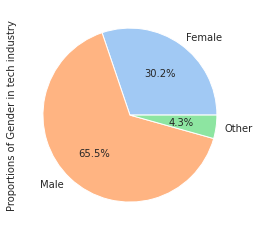

In [88]:
# Proportions of Gender in tech industry
data_df.groupby(['gender']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Proportions of Gender in tech industry', colors = colors)

<ipython-input-89-8486083049ff>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)


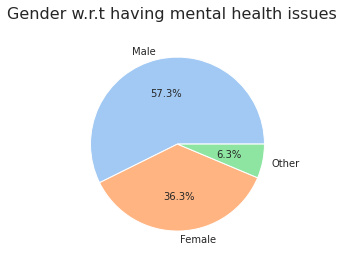

In [89]:
male_with_mental_health = data_df[(data_df["mental_health"] == 'Yes') & (data_df["gender"] == 'Male')]
female_with_mental_health = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Female')]
other_with_mental_health = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Other')]

sizes = [
    male_with_mental_health['gender'].value_counts(),
    female_with_mental_health['gender'].value_counts(),
    other_with_mental_health['gender'].value_counts(),
]
labels = ['Male', 'Female', 'Other']

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having mental health issues', fontsize=16)
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)
plt.show()

Following observations can be derived from above.

- Around 60% of male employes have mental health issues while 35% female are effected with mental illness. 

#### Mental health distribution by age and gender

In [90]:
data_df['mental_health'].describe()

count     1242
unique       4
top        Yes
freq       553
Name: mental_health, dtype: object

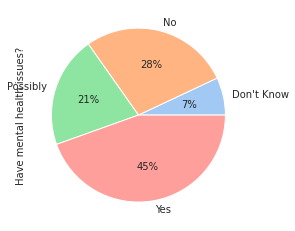

In [91]:
data_df.groupby(['mental_health']).size().plot(kind='pie', autopct='%1.0f%%', label='Have mental health issues?', colors = colors)

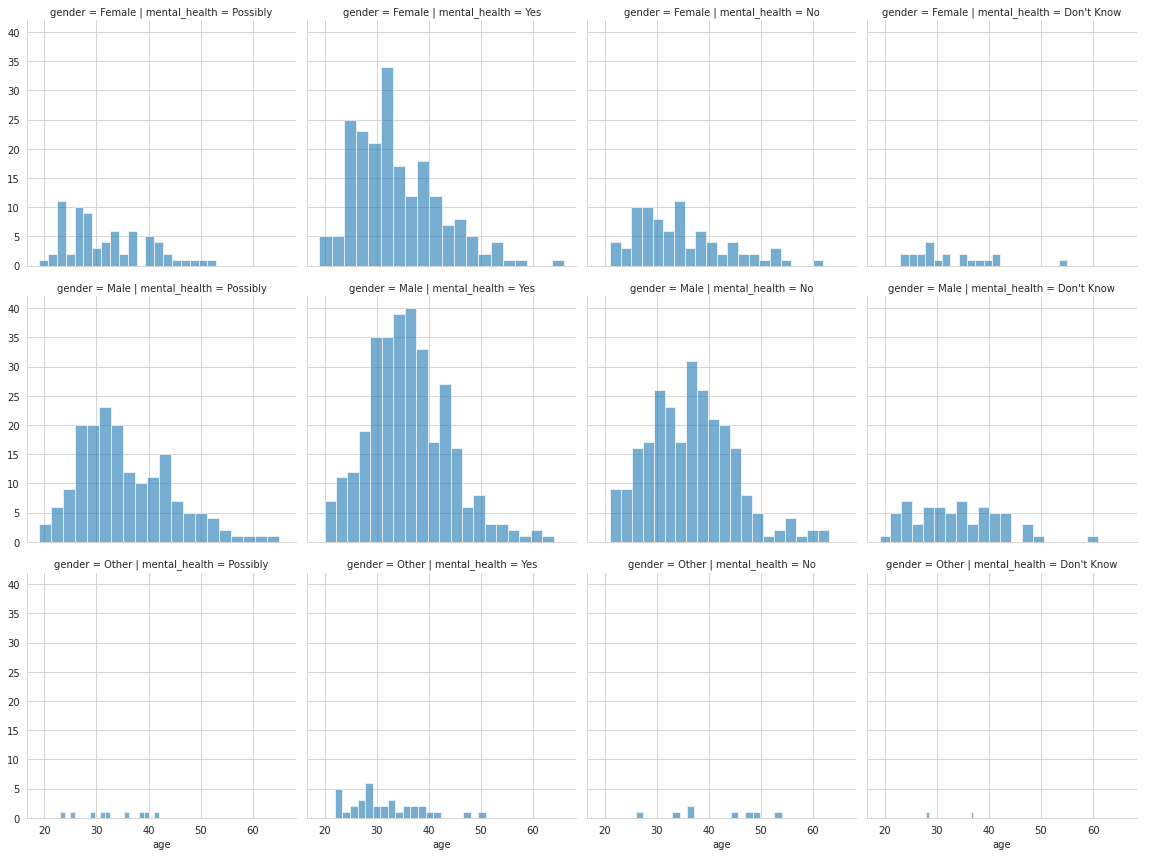

In [92]:
# It can be seen as mostly say Yes and mostly are Men in their 30s in our data. So lets plot them together to further analyze

g = sns.FacetGrid(data_df, row = 'gender', col = 'mental_health', height = 4)
g.map(plt.hist, 'age', bins = 20, alpha = 0.6)
g.add_legend()
plt.show()


Following observations can be derived from above.

- Most Men in their 30s in our data have Mental health issues.
- More female employees have mental health disorders than those who don't. 
- Mostly employees whose gender falls under 'Others' catgory hav less to no mental health issues.
- 67% of employees are effected with mental illness overall.



#### Are companies taking Mental Health issues seriously?


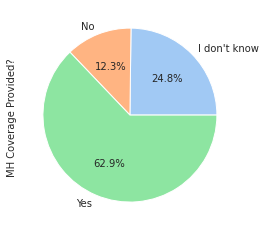

In [93]:
data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Coverage Provided? ', colors = colors)

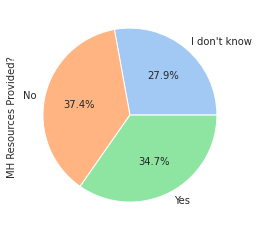

In [94]:
data_df.groupby(['workplace_resources']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'MH Resources Provided? ', colors = colors)

Following observations can be derived from above.

- More than 60% employee have medical coverage provided from employer, but not the resources to get more information, suggesting that companies do not get active involvement.
- Around 12% employee do not have medical coverage.

#### How easy is discussing Mental Health at Work?


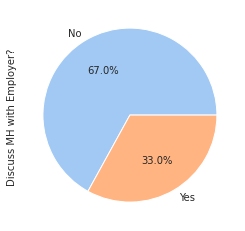

In [95]:
data_df.groupby(['mh_employer_discussion']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Employer? ', colors = colors)

<ipython-input-96-6c9fb5b83680>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)


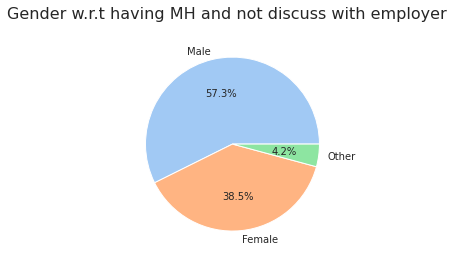

In [96]:
male_has_mh_and_not_discussed = data_df[(data_df["mental_health"] == 'Yes') & (data_df["gender"] == 'Male') & (data_df["mh_employer_discussion"] == 'No')]
female_has_mh_and_not_discussed = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Female') & (data_df["mh_employer_discussion"] == 'No')]
other_has_mh_and_not_discussed = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Other') & (data_df["mh_employer_discussion"] == 'No')]

sizes = [
    male_has_mh_and_not_discussed['gender'].value_counts(),
    female_has_mh_and_not_discussed['gender'].value_counts(),
    other_has_mh_and_not_discussed['gender'].value_counts(),
]
labels = ['Male', 'Female', 'Other']

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and not discuss with employer', fontsize=16)
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)
plt.show()

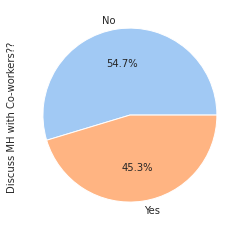

In [97]:
data_df.groupby(['mh_coworker_discussion']).size().plot(kind = 'pie', autopct = '%1.1f%%', label = 'Discuss MH with Co-workers?? ', colors = colors)

<ipython-input-98-902f1f960753>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)


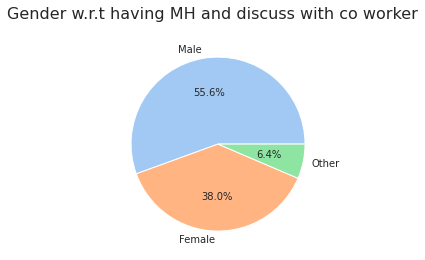

In [98]:
male_has_mh_and_not_discussed = data_df[(data_df["mental_health"] == 'Yes') & (data_df["gender"] == 'Male') & (data_df["mh_coworker_discussion"] == 'Yes')]
female_has_mh_and_not_discussed = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Female') & (data_df["mh_coworker_discussion"] == 'Yes')]
other_has_mh_and_not_discussed = data_df[(data_df["mental_health"] =='Yes') & (data_df["gender"] == 'Other') & (data_df["mh_coworker_discussion"] == 'Yes')]

sizes = [
    male_has_mh_and_not_discussed['gender'].value_counts(),
    female_has_mh_and_not_discussed['gender'].value_counts(),
    other_has_mh_and_not_discussed['gender'].value_counts(),
]
labels = ['Male', 'Female', 'Other']

fig1, ax1 = plt.subplots()
fig1.suptitle('Gender w.r.t having MH and discuss with co worker', fontsize=16)
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors)
plt.show()

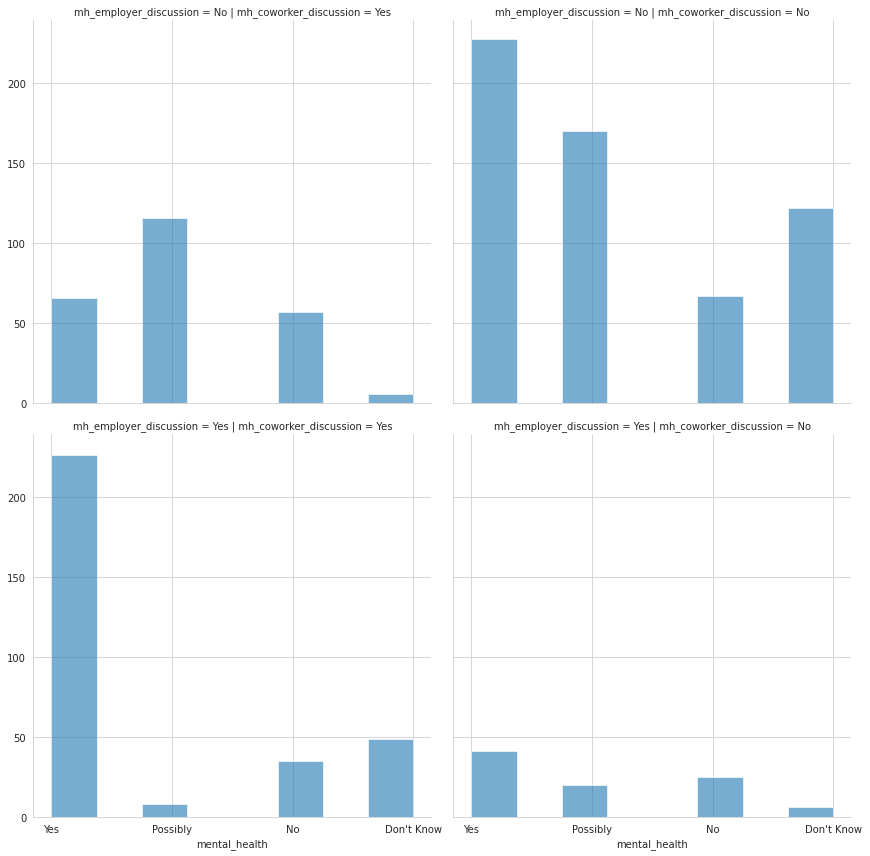

In [99]:
g = sns.FacetGrid(data_df, row = 'mh_employer_discussion', col = 'mh_coworker_discussion', height = 6)
g.map(plt.hist, 'mental_health', bins = 8, alpha = 0.6)
g.add_legend()
plt.show()


Following observations can be derived from above.

- Overall 67% feel difficult to discuss the MH issues with employer, hence never discussed.

- Out of those, around 60% male who have active mental health issues have not discussed with their current employer.

- More than half (50%) males who have mental health issues have discussed with their co-workes.

- Almost all who have MH and discussed with employer have openly discuss with co workers, while there are a lot of those who have not discuss with employer but have discussd with co worker, suggesting they ar affraid of negative consequences.

#### How easy is to discuss openly about Mental Health with friends/family?

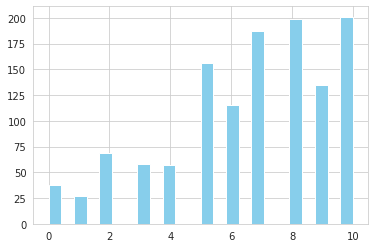

In [100]:
plt.hist(data_df['mh_share'], bins=24, color = "skyblue")
plt.show()


Following observations can be derived from above.

- More than half of the respondents share or tends to share MH illness with their family and friends.

### Predictions

In [101]:
data2 = pd.get_dummies(data_df, drop_first=True)
print(data2.shape)
data2.columns

(1242, 44)


Index(['mh_share', 'age', 'tech_company_Yes', 'benefits_No', 'benefits_Yes',
       'workplace_resources_No', 'workplace_resources_Yes',
       'mh_employer_discussion_Yes', 'mh_coworker_discussion_Yes',
       'medical_coverage_Yes', 'mental_health_No', 'mental_health_Possibly',
       'mental_health_Yes', 'gender_Male', 'gender_Other', 'country_Austria',
       'country_Brazil', 'country_Canada', 'country_Colombia',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_India',
       'country_Indonesia', 'country_Ireland', 'country_Japan',
       'country_Kenya', 'country_Macedonia', 'country_Mauritius',
       'country_Mexico', 'country_Mongolia', 'country_Netherlands',
       'country_Norway', 'country_Pakistan', 'country_Philippines',
       'country_Poland', 'country_Portugal', 'country_Spain', 'country_Sweden',
       'country_Switzerland', 'country_United Kingdom',
       'country_United States of America'],
      dt

In [102]:
X = data2.drop('mental_health_Yes', axis=1)
y = data2['mental_health_Yes']

In [103]:
#Categorical feature selection
from sklearn.feature_selection import SelectKBest, chi2

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 mh_share: 85.593267
 age: 0.468030
 tech_company_Yes: 0.308699
 benefits_No: 0.033382
 benefits_Yes: 12.073233
 workplace_resources_No: 0.033411
 workplace_resources_Yes: 1.866814
 mh_employer_discussion_Yes: 70.419068
 mh_coworker_discussion_Yes: 59.974250
 medical_coverage_Yes: 0.243084
 mental_health_No: 276.901306
 mental_health_Possibly: 206.271408
 gender_Male: 10.078599
 gender_Other: 9.000165
 country_Austria: 0.802612
 country_Brazil: 1.852083
 country_Canada: 2.190457
 country_Colombia: 1.245931
 country_Estonia: 1.605225
 country_Finland: 2.491863
 country_France: 7.774277
 country_Germany: 4.486860
 country_Greece: 0.802612
 country_India: 8.828737
 country_Indonesia: 0.024272
 country_Ireland: 1.217546
 country_Japan: 0.802612
 country_Kenya: 0.802612
 country_Macedonia: 0.802612
 country_Mauritius: 0.802612
 country_Mexico: 0.152127
 country_Mongolia: 0.802612
 country_Netherlands: 1.708279
 country_Norway: 2.491863
 country_Pakistan: 0.802612
 country_Philippines: 0.024

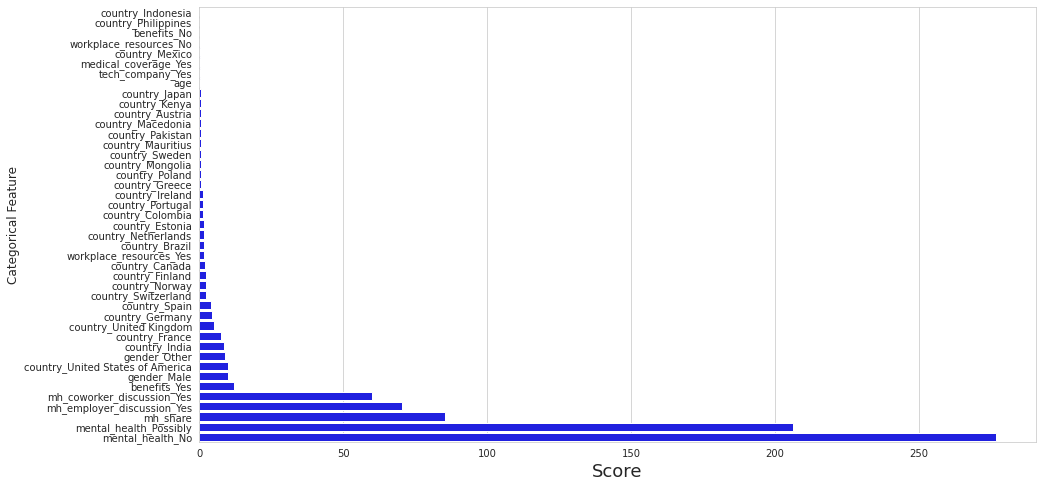

In [104]:
#Plot scores
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()